# grid simple

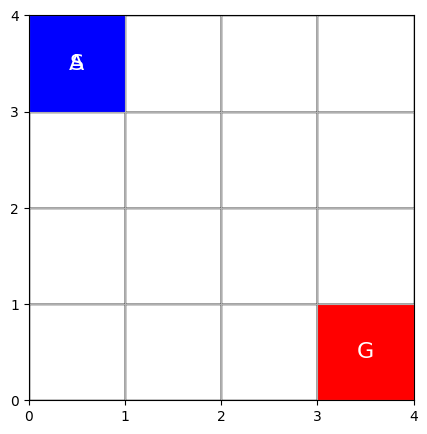

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

class GridWorld:
    def __init__(self, size=4, start=(0,0), goal=(3,3)):
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def render(self):
        fig, ax = plt.subplots(figsize=(5,5))

        # Draw grid cells
        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size-1-i), 1, 1,
                                         linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        # Draw start, goal, and agent
        sx, sy = self.start
        gx, gy = self.goal
        ax.add_patch(patches.Rectangle((sy, self.size-1-sx), 1, 1, facecolor='green'))
        ax.add_patch(patches.Rectangle((gy, self.size-1-gx), 1, 1, facecolor='red'))

        ax.add_patch(patches.Rectangle((self.state[1], self.size-1-self.state[0]), 1, 1, facecolor='blue'))

        # Optional: text labels
        ax.text(sy+0.5, self.size-1-sx+0.5, 'S', ha='center', va='center', color='white', fontsize=16)
        ax.text(gy+0.5, self.size-1-gx+0.5, 'G', ha='center', va='center', color='white', fontsize=16)
        ax.text(self.state[1]+0.5, self.size-1-self.state[0]+0.5, 'A', ha='center', va='center', color='white', fontsize=16)

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(range(self.size+1))
        ax.set_yticks(range(self.size+1))
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show(block=False)
        plt.pause(0.8)
        plt.clf()


# Example usage
env = GridWorld()
env.reset()

# Just show start, goal, and agent
env.render()
plt.close()


In [ ]:
!pip install stable-baselines3[extra] gymnasium matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install imageio[ffmpeg]


In [ ]:
!pip install stable-baselines3[extra] gymnasium matplotlib numpy imageio[ffmpeg]


In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io # Import io for BytesIO

class GridWorld(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4} # Added 'rgb_array'

    def __init__(self, size=4, start=(0,0), goal=(3,3)):
        super(GridWorld, self).__init__()
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start

        # Définir les espaces d’action et d’observation
        self.action_space = spaces.Discrete(4)  # 0: haut, 1: bas, 2: gauche, 3: droite
        self.observation_space = spaces.Box(low=0, high=size-1, shape=(2,), dtype=np.int32)

        self.figure = None # Initialize figure for rendering
        self.ax = None     # Initialize axes for rendering

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.state = self.start
        return np.array(self.state, dtype=np.int32), {}

    def step(self, action):
        x, y = self.state

        # Mouvement selon l’action
        if action == 0 and x > 0: x -= 1         # haut
        elif action == 1 and x < self.size-1: x += 1  # bas
        elif action == 2 and y > 0: y -= 1       # gauche
        elif action == 3 and y < self.size-1: y += 1  # droite

        self.state = (x, y)

        # Calcul de la récompense
        if self.state == self.goal:
            reward = 10
            terminated = True
        else:
            reward = -1
            terminated = False

        return np.array(self.state, dtype=np.int32), reward, terminated, False, {}

    def render(self):
        if self.figure is None: # Create figure and axes only once
            self.figure, self.ax = plt.subplots(figsize=(5,5))

        self.ax.clear() # Clear axes for new frame

        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size-1-i), 1, 1,
                                         linewidth=1, edgecolor='black', facecolor='white')
                self.ax.add_patch(rect)

        # Cases start, goal et agent
        sx, sy = self.start
        gx, gy = self.goal
        self.ax.add_patch(patches.Rectangle((sy, self.size-1-sx), 1, 1, facecolor='green'))
        self.ax.add_patch(patches.Rectangle((gy, self.size-1-gx), 1, 1, facecolor='red'))
        self.ax.add_patch(patches.Rectangle((self.state[1], self.size-1-self.state[0]), 1, 1, facecolor='blue'))

        self.ax.text(sy+0.5, self.size-1-sx+0.5, 'S', ha='center', va='center', color='white', fontsize=16)
        self.ax.text(gy+0.5, self.size-1-gx+0.5, 'G', ha='center', va='center', color='white', fontsize=16)
        self.ax.text(self.state[1]+0.5, self.size-1-self.state[0]+0.5, 'A', ha='center', va='center', color='white', fontsize=16)

        self.ax.set_xlim(0, self.size)
        self.ax.set_ylim(0, self.size)
        self.ax.set_xticks(range(self.size+1))
        self.ax.set_yticks(range(self.size+1))
        self.ax.set_aspect('equal')
        self.ax.grid(True)

        # Convert plot to image array
        self.figure.canvas.draw()
        image_from_plot = np.frombuffer(self.figure.canvas.tostring_rgb(), dtype=np.uint8)
        image_from_plot = image_from_plot.reshape(self.figure.canvas.get_width_height()[::-1] + (3,))
        return image_from_plot

    def close(self):
        if self.figure is not None:
            plt.close(self.figure)
            self.figure = None
            self.ax = None

In [ ]:
from stable_baselines3 import PPO

env = GridWorld()
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=50000)


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 52.8     |
|    ep_rew_mean     | -41.8    |
| time/              |          |
|    fps             | 1348     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 41.1        |
|    ep_rew_mean          | -30.1       |
| time/                   |             |
|    fps                  | 1003        |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013788018 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.0203      |
|    learning_rate        | 0.0003      |
|    loss                 | 23.5        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0293     |
|    value_loss           | 93.2        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 18.5  

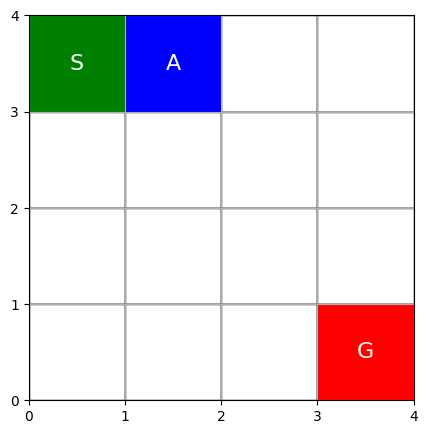

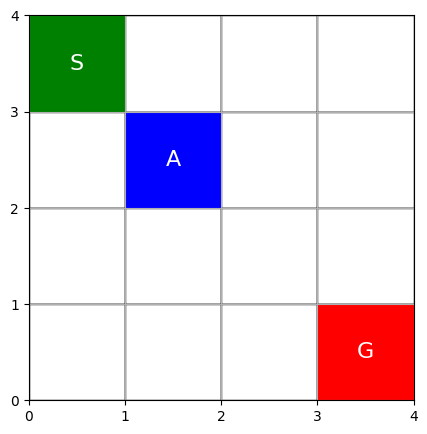

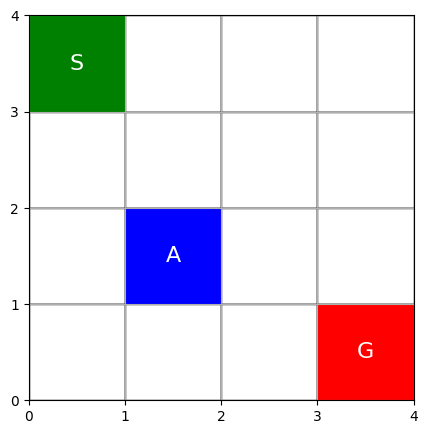

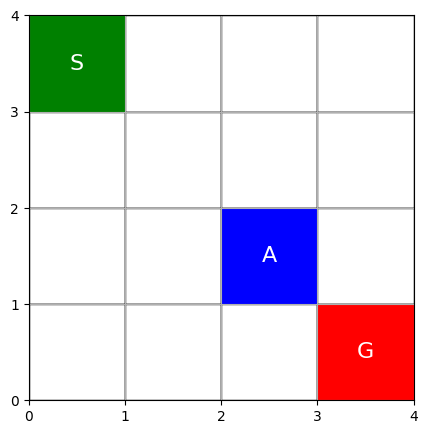

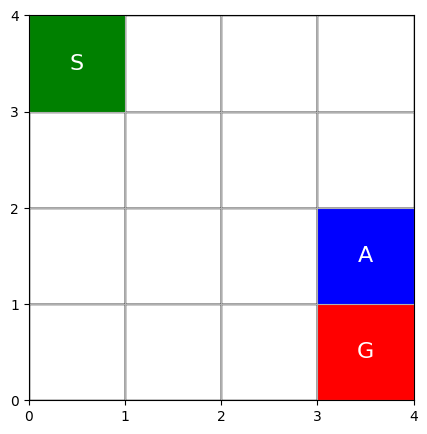

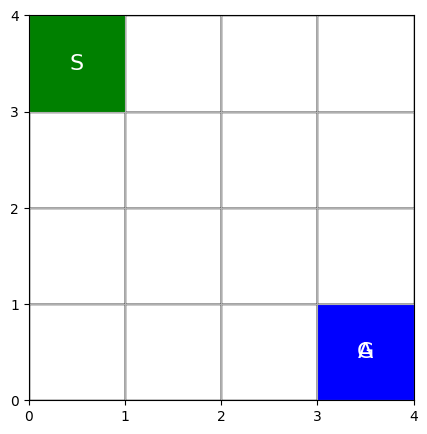

🏁 Goal reached in 6 steps!


In [ ]:
obs, info = env.reset()
for step in range(20):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    env.render()
    if terminated or truncated:
        print("🏁 Goal reached in", step+1, "steps!")
        break


In [ ]:
!pip install stable-baselines3[extra] gymnasium matplotlib numpy imageio[ffmpeg]


In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imageio, os

class GridWorld(gym.Env):
    metadata = {"render_modes": ["rgb_array"], "render_fps": 4}

    def __init__(self, size=4, start=(0,0), goal=(3,3), render_mode=None):
        super(GridWorld, self).__init__()
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start
        self.render_mode = render_mode

        self.action_space = spaces.Discrete(4)  # 0=haut, 1=bas, 2=gauche, 3=droite
        self.observation_space = spaces.Box(low=0, high=size-1, shape=(2,), dtype=np.int32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.state = self.start
        return np.array(self.state, dtype=np.int32), {}

    def step(self, action):
        x, y = self.state

        if action == 0 and x > 0: x -= 1
        elif action == 1 and x < self.size-1: x += 1
        elif action == 2 and y > 0: y -= 1
        elif action == 3 and y < self.size-1: y += 1

        self.state = (x, y)

        if self.state == self.goal:
            reward = 10
            terminated = True
        else:
            reward = -1
            terminated = False

        return np.array(self.state, dtype=np.int32), reward, terminated, False, {}

    def render(self):
        fig, ax = plt.subplots(figsize=(4,4))
        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size-1-i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        sx, sy = self.start
        gx, gy = self.goal
        ax.add_patch(patches.Rectangle((sy, self.size-1-sx), 1, 1, facecolor='green'))
        ax.add_patch(patches.Rectangle((gy, self.size-1-gx), 1, 1, facecolor='red'))
        ax.add_patch(patches.Rectangle((self.state[1], self.size-1-self.state[0]), 1, 1, facecolor='blue'))

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.axis('off')
        fig.canvas.draw()

        # Convertir en image RGB (numpy array)
        # Use fig.canvas.renderer.buffer_rgba() and reshape for compatibility with Agg backend
        width, height = fig.canvas.get_width_height()
        buf = fig.canvas.renderer.buffer_rgba()
        img = np.asarray(buf).reshape(height, width, 4)[:, :, :3] # Take RGB channels only
        plt.close(fig)
        return img

    def close(self):
        # In this render implementation, new figures are created and closed in render().
        # No specific action needed for persistent figure objects, but maintaining the method for Gymnasium API consistency.
        pass


In [ ]:
from stable_baselines3 import PPO

env = GridWorld(render_mode="rgb_array")
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 91       |
|    ep_rew_mean     | -80      |
| time/              |          |
|    fps             | 1452     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 41.3        |
|    ep_rew_mean          | -30.3       |
| time/                   |             |
|    fps                  | 1040        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013832966 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss   

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 6.14        |
|    ep_rew_mean          | 4.86        |
| time/                   |             |
|    fps                  | 770         |
|    iterations           | 9           |
|    time_elapsed         | 23          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.015276202 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.514      |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0597      |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0209     |
|    value_loss           | 0.171       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 6.06  

In [ ]:
import os
import imageio

os.makedirs("videos", exist_ok=True)
frames = []

# Re-create environment to ensure it uses the updated GridWorld class definition
env = GridWorld(render_mode="rgb_array")
obs, info = env.reset()
for _ in range(30):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        obs, info = env.reset()

# Sauvegarder la vidéo
video_path = "videos/gridworld_agent.mp4"
imageio.mimsave(video_path, frames, fps=4)
print("✅ Vidéo enregistrée :", video_path)

env.close() # Close the environment

✅ Vidéo enregistrée : videos/gridworld_agent.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open("videos/gridworld_agent.mp4","rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width="400" height="400" controls><source src="{data_url}" type="video/mp4"></video>')


# gridword avec obstacle

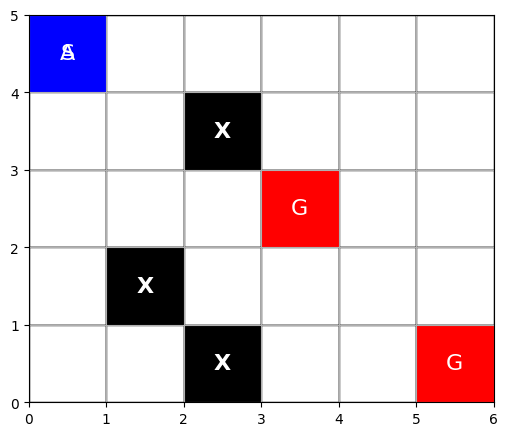

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class GridWorld:
    def __init__(self,
                 size=(4,4),              # shape of grid (rows, cols)
                 start=(0,0),             # start position
                 goals=[(3,3)],           # list of goal positions
                 obstacles=[],            # list of obstacle positions
                 agent_color='green',     # agent color
                 goal_color='red',        # goal color
                 obstacle_color='gray'):  # obstacle color

        self.rows, self.cols = size
        self.start = start
        self.state = start
        self.goals = goals
        self.obstacles = obstacles
        self.agent_color = agent_color
        self.goal_color = goal_color
        self.obstacle_color = obstacle_color

    def reset(self):
        self.state = self.start
        return self.state

    def render(self):
        fig, ax = plt.subplots(figsize=(6,6))

        # Draw grid
        for i in range(self.rows):
            for j in range(self.cols):
                rect = patches.Rectangle((j, self.rows-1-i), 1, 1,
                                         linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        # Draw obstacles
        for (x, y) in self.obstacles:
            ax.add_patch(patches.Rectangle((y, self.rows-1-x), 1, 1, facecolor=self.obstacle_color))
            ax.text(y+0.5, self.rows-1-x+0.5, 'X', ha='center', va='center', color='white', fontsize=16, weight='bold')

        # Draw goals
        for (gx, gy) in self.goals:
            ax.add_patch(patches.Rectangle((gy, self.rows-1-gx), 1, 1, facecolor=self.goal_color))
            ax.text(gy+0.5, self.rows-1-gx+0.5, 'G', ha='center', va='center', color='white', fontsize=16)

        # Draw start
        sx, sy = self.start
        ax.add_patch(patches.Rectangle((sy, self.rows-1-sx), 1, 1, facecolor='orange'))
        ax.text(sy+0.5, self.rows-1-sx+0.5, 'S', ha='center', va='center', color='white', fontsize=16)

        # Draw agent
        ax.add_patch(patches.Rectangle((self.state[1], self.rows-1-self.state[0]), 1, 1, facecolor=self.agent_color))
        ax.text(self.state[1]+0.5, self.rows-1-self.state[0]+0.5, 'A', ha='center', va='center', color='white', fontsize=16)

        ax.set_xlim(0, self.cols)
        ax.set_ylim(0, self.rows)
        ax.set_xticks(range(self.cols+1))
        ax.set_yticks(range(self.rows+1))
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show(block=False)
        plt.pause(1)
        plt.clf()


# Exemple d'utilisation
env = GridWorld(
    size=(5,6),
    start=(0,0),
    goals=[(4,5), (2,3)],
    obstacles=[(1,2), (3,1), (4,2)],
    agent_color='blue',
    goal_color='red',
    obstacle_color='black'
)

env.reset()
env.render()
plt.close()


In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imageio, os

class GridWorldObstacles(gym.Env):
    metadata = {"render_modes": ["rgb_array"], "render_fps": 4}

    def __init__(self, size=6, start=(0,0), goal=(5,5), obstacles=None, render_mode=None):
        super(GridWorldObstacles, self).__init__()
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start
        self.render_mode = render_mode

        # Obstacles par défaut
        if obstacles is None:
            self.obstacles = [(1,2), (2,2), (3,1), (4,3), (1,4)]
        else:
            self.obstacles = obstacles

        # Espaces d’action et d’observation
        self.action_space = spaces.Discrete(4)  # 0=haut, 1=bas, 2=gauche, 3=droite
        self.observation_space = spaces.Box(low=0, high=size-1, shape=(2,), dtype=np.int32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.state = self.start
        return np.array(self.state, dtype=np.int32), {}

    def step(self, action):
        x, y = self.state

        # Mouvement selon l’action
        if action == 0 and x > 0: x -= 1         # haut
        elif action == 1 and x < self.size-1: x += 1  # bas
        elif action == 2 and y > 0: y -= 1       # gauche
        elif action == 3 and y < self.size-1: y += 1  # droite

        new_state = (x, y)

        # Si obstacle → pénalité forte
        if new_state in self.obstacles:
            reward = -10
            terminated = True
        # Si but → récompense élevée
        elif new_state == self.goal:
            reward = 20
            terminated = True
        # Sinon petit coût pour chaque pas
        else:
            reward = -1
            terminated = False

        self.state = new_state
        return np.array(self.state, dtype=np.int32), reward, terminated, False, {}

    def render(self):
        fig, ax = plt.subplots(figsize=(5,5))
        # Grille
        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size-1-i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        # Obstacles
        for (ox, oy) in self.obstacles:
            ax.add_patch(patches.Rectangle((oy, self.size-1-ox), 1, 1, facecolor='gray'))

        # Start, goal, agent
        sx, sy = self.start
        gx, gy = self.goal
        ax.add_patch(patches.Rectangle((sy, self.size-1-sx), 1, 1, facecolor='green'))
        ax.add_patch(patches.Rectangle((gy, self.size-1-gx), 1, 1, facecolor='red'))
        ax.add_patch(patches.Rectangle((self.state[1], self.size-1-self.state[0]), 1, 1, facecolor='blue'))

        # Étiquettes
        ax.text(sy+0.5, self.size-1-sx+0.5, 'S', ha='center', va='center', color='white', fontsize=14)
        ax.text(gy+0.5, self.size-1-gx+0.5, 'G', ha='center', va='center', color='white', fontsize=14)

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.axis('off')
        fig.canvas.draw()

        # Changed to use buffer_rgba for compatibility
        width, height = fig.canvas.get_width_height()
        buf = fig.canvas.renderer.buffer_rgba()
        img = np.asarray(buf).reshape(height, width, 4)[:, :, :3] # Take RGB channels only
        plt.close(fig)
        return img

    def close(self):
        # In this render implementation, new figures are created and closed in render().
        # No specific action needed for persistent figure objects, but maintaining the method for Gymnasium API consistency.
        pass


In [ ]:
from stable_baselines3 import PPO

env = GridWorldObstacles(render_mode="rgb_array")
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100_000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.9     |
|    ep_rew_mean     | -22.6    |
| time/              |          |
|    fps             | 1383     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 9.46        |
|    ep_rew_mean          | -18.2       |
| time/                   |             |
|    fps                  | 997         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015170872 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss   

In [ ]:
os.makedirs("videos", exist_ok=True)
frames = []

obs, info = env.reset()
for _ in range(50):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        obs, info = env.reset()

video_path = "videos/gridworld_obstacles.mp4"
imageio.mimsave(video_path, frames, fps=4)
print("✅ Vidéo enregistrée :", video_path)


✅ Vidéo enregistrée : videos/gridworld_obstacles.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open("videos/gridworld_obstacles.mp4","rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width="450" height="450" controls><source src="{data_url}" type="video/mp4"></video>')


# obstacles variabless

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imageio, os, random

class GridWorldDynamic(gym.Env):
    metadata = {"render_modes": ["rgb_array"], "render_fps": 4}

    def __init__(self, size=6, start=(0,0), goal=(5,5), n_obstacles=6, render_mode=None):
        super(GridWorldDynamic, self).__init__()
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start
        self.render_mode = render_mode
        self.n_obstacles = n_obstacles

        # Espace d’action et d’observation
        self.action_space = spaces.Discrete(4)  # 0=haut, 1=bas, 2=gauche, 3=droite
        self.observation_space = spaces.Box(low=0, high=size-1, shape=(2,), dtype=np.int32)

        self.obstacles = []
        self.reset_obstacles()

    def reset_obstacles(self):
        """Place des obstacles aléatoirement, sans bloquer Start ou Goal."""
        all_cells = [(i, j) for i in range(self.size) for j in range(self.size)
                     if (i, j) not in [self.start, self.goal]]
        self.obstacles = random.sample(all_cells, self.n_obstacles)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.reset_obstacles()
        self.state = self.start
        return np.array(self.state, dtype=np.int32), {}

    def step(self, action):
        x, y = self.state

        # Mouvement selon l’action
        if action == 0 and x > 0: x -= 1          # haut
        elif action == 1 and x < self.size-1: x += 1  # bas
        elif action == 2 and y > 0: y -= 1        # gauche
        elif action == 3 and y < self.size-1: y += 1  # droite

        new_state = (x, y)

        if new_state in self.obstacles:
            reward = -10
            terminated = True
        elif new_state == self.goal:
            reward = 20
            terminated = True
        else:
            reward = -1
            terminated = False

        self.state = new_state
        return np.array(self.state, dtype=np.int32), reward, terminated, False, {}

    def render(self):
        fig, ax = plt.subplots(figsize=(5,5))
        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size-1-i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        # Obstacles
        for (ox, oy) in self.obstacles:
            ax.add_patch(patches.Rectangle((oy, self.size-1-ox), 1, 1, facecolor='gray'))

        # Start, goal, agent
        sx, sy = self.start
        gx, gy = self.goal
        ax.add_patch(patches.Rectangle((sy, self.size-1-sx), 1, 1, facecolor='green'))
        ax.add_patch(patches.Rectangle((gy, self.size-1-gx), 1, 1, facecolor='red'))
        ax.add_patch(patches.Rectangle((self.state[1], self.size-1-self.state[0]), 1, 1, facecolor='blue'))

        # Labels
        ax.text(sy+0.5, self.size-1-sx+0.5, 'S', ha='center', va='center', color='white', fontsize=14)
        ax.text(gy+0.5, self.size-1-gx+0.5, 'G', ha='center', va='center', color='white', fontsize=14)
        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.axis('off')
        fig.canvas.draw()

        # Use buffer_rgba() for compatibility with Agg backend
        width, height = fig.canvas.get_width_height()
        buf = fig.canvas.renderer.buffer_rgba()
        img = np.asarray(buf).reshape(height, width, 4)[:, :, :3] # Take RGB channels only
        plt.close(fig) # Close the figure to free up memory
        return img

    def close(self):
        # In this render implementation, new figures are created and closed in render().
        # No specific action needed for persistent figure objects, but maintaining the method for Gymnasium API consistency.
        pass


In [ ]:
from stable_baselines3 import PPO

env = GridWorldDynamic(render_mode="rgb_array")
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=200_000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.8     |
|    ep_rew_mean     | -20.2    |
| time/              |          |
|    fps             | 1162     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 9.98        |
|    ep_rew_mean          | -18.4       |
| time/                   |             |
|    fps                  | 945         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010773886 |
|    clip_fraction        | 0.126       |
|    clip_range           | 0.2         |
|    entropy_loss   

In [ ]:
os.makedirs("videos", exist_ok=True)
frames = []

obs, info = env.reset()
for _ in range(80):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    if terminated or truncated:
        obs, info = env.reset()

video_path = "videos/gridworld_dynamic.mp4"
imageio.mimsave(video_path, frames, fps=4)
print("✅ Vidéo enregistrée :", video_path)


✅ Vidéo enregistrée : videos/gridworld_dynamic.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open("videos/gridworld_dynamic.mp4","rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width="450" height="450" controls><source src="{data_url}" type="video/mp4"></video>')


# dynamic gaol

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imageio, os, random

class GridWorldDynamicGoal(gym.Env):
    metadata = {"render_modes": ["rgb_array"], "render_fps": 4}

    def __init__(self, size=6, start=(0,0), n_obstacles=6, render_mode=None):
        super(GridWorldDynamicGoal, self).__init__()
        self.size = size
        self.start = start
        self.state = start
        self.render_mode = render_mode
        self.n_obstacles = n_obstacles

        # Définir les espaces
        self.action_space = spaces.Discrete(4)  # 0=haut, 1=bas, 2=gauche, 3=droite
        self.observation_space = spaces.Box(low=0, high=size-1, shape=(4,), dtype=np.int32)
        # Observation = [agent_x, agent_y, goal_x, goal_y]

        # Générer les obstacles et le goal
        self.reset_obstacles()
        self.reset_goal()

    def reset_obstacles(self):
        """Place des obstacles aléatoires sans bloquer le start ou le goal."""
        all_cells = [(i, j) for i in range(self.size) for j in range(self.size)
                     if (i, j) != self.start]
        self.obstacles = random.sample(all_cells, self.n_obstacles)

    def reset_goal(self):
        """Place le goal aléatoirement sans chevaucher start ou obstacles."""
        free_cells = [(i, j) for i in range(self.size) for j in range(self.size)
                      if (i, j) not in [self.start] + self.obstacles]
        self.goal = random.choice(free_cells)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.reset_obstacles()
        self.reset_goal()
        self.state = self.start
        obs = np.array([self.state[0], self.state[1], self.goal[0], self.goal[1]], dtype=np.int32)
        return obs, {}

    def step(self, action):
        x, y = self.state

        # Mouvements
        if action == 0 and x > 0: x -= 1          # haut
        elif action == 1 and x < self.size-1: x += 1  # bas
        elif action == 2 and y > 0: y -= 1        # gauche
        elif action == 3 and y < self.size-1: y += 1  # droite

        new_state = (x, y)

        if new_state in self.obstacles:
            reward = -10
            terminated = True
        elif new_state == self.goal:
            reward = 20
            terminated = True
        else:
            reward = -1
            terminated = False

        self.state = new_state
        obs = np.array([self.state[0], self.state[1], self.goal[0], self.goal[1]], dtype=np.int32)
        return obs, reward, terminated, False, {}

    def render(self):
        fig, ax = plt.subplots(figsize=(5,5))
        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size-1-i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        # Obstacles
        for (ox, oy) in self.obstacles:
            ax.add_patch(patches.Rectangle((oy, self.size-1-ox), 1, 1, facecolor='gray'))

        # Start, goal, agent
        sx, sy = self.start
        gx, gy = self.goal
        ax.add_patch(patches.Rectangle((sy, self.size-1-sx), 1, 1, facecolor='green'))
        ax.add_patch(patches.Rectangle((gy, self.size-1-gx), 1, 1, facecolor='red'))
        ax.add_patch(patches.Rectangle((self.state[1], self.size-1-self.state[0]), 1, 1, facecolor='blue'))

        # Labels
        ax.text(sy+0.5, self.size-1-sx+0.5, 'S', ha='center', va='center', color='white', fontsize=14)
        ax.text(gy+0.5, self.size-1-gx+0.5, 'G', ha='center', va='center', color='white', fontsize=14)
        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.axis('off')
        fig.canvas.draw()

        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)
        return img


In [ ]:
from stable_baselines3 import PPO

env = GridWorldDynamicGoal(render_mode="rgb_array")
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=300_000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.8     |
|    ep_rew_mean     | -14.7    |
| time/              |          |
|    fps             | 1364     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 9.5         |
|    ep_rew_mean          | -14         |
| time/                   |             |
|    fps                  | 1003        |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013605677 |
|    clip_fraction        | 0.214       |
|    clip_range           | 0.2         |
|    entropy_loss   